In [105]:
import numpy as np 
import pandas as pd 
import os 
import subprocess
import matplotlib.pyplot as plt
import matplotlib
import ast
matplotlib.rcParams['font.family']='serif'
matplotlib.rcParams['text.usetex'] = True
from scipy.interpolate import griddata

# Define filtering and plotting functions


In [32]:
def filter_data(tanb_value):
    filtered_df = dataframe[(dataframe['tanb'] == tanb_value) & (dataframe['mhiggs'].apply(lambda x: isinstance(x, list) and 
                                                                  len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)))].reset_index(drop=True)
    return filtered_df

# Plot for $M=1000GeV$

In [106]:
# Function to parse strings representing lists -- since my dataframe contains both floats and lists of floats 

def parse_list(column_entry):
    try:
        return ast.literal_eval(column_entry) if isinstance(column_entry, str) else column_entry
    except (ValueError, SyntaxError):
        return None  
        
# Read the file and parse the 'mhiggs' and 'errors' columns
df1K = pd.read_csv(
    '/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/tool_results_from_cluster/nmssm_params_mass_1000.csv',
    converters={
        'mhiggs': parse_list,
        'errors': parse_list
    },
    index_col = 0
)

print(df1K.dtypes)


tanb      float64
mA        float64
lam       float64
kappa     float64
At/M      float64
Ak        float64
mhiggs     object
errors     object
dtype: object


### $\tan \beta =5$

In [37]:
tb5_1K = df1K[
    (df1K['tanb'] == 5) &
    (df1K['mhiggs'].apply(
        lambda x: isinstance(x, list) and len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)
    ))
].reset_index(drop=True)
tb5_1K = tb5_1K.copy()
tb5_1K['Xt/M'] = tb5_1K['At/M'] - 2/5
tb5_1K.head(2)

,tanb,mA,lam,kappa,At/M,Ak,mhiggs,errors,Xt/M
0,5.0,1000.0,0.01,0.001,2.0,-495.0,"[113.934461, 248.629374, 1046.89839]","[1.53, 0.07, 421.15]",1.6
1,5.0,1000.0,0.01,0.001,2.0,-242.5,"[115.914517, 334.455525, 1046.89315]","[1.6, 0.02, 421.16]",1.6


In [39]:
max(tb5_1K['errors'])

[300000.0, 300000.0, 300000.0]

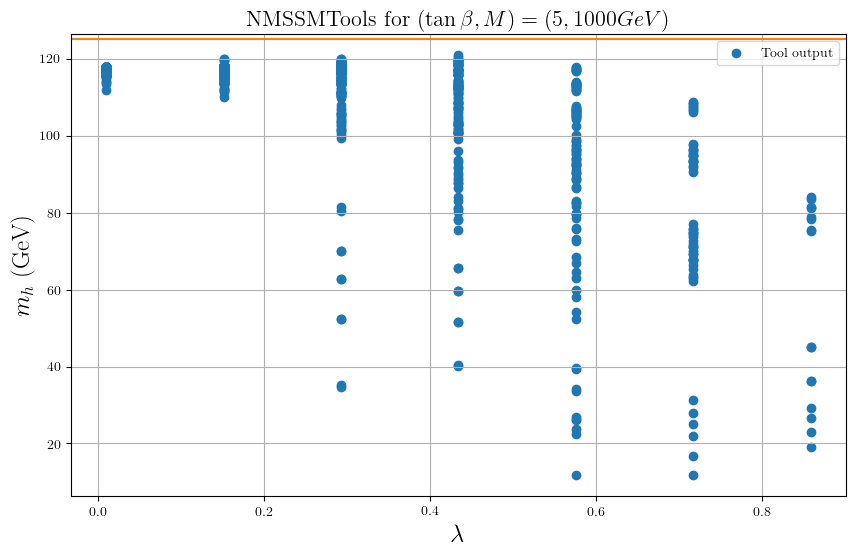

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(tb5_1K['lam'],tb5_1K['mhiggs'].apply(lambda x: x[0]).values, label=r'Tool output')
#plt.errorbar(tb5_1K['lam'], tb5_1K['mhiggs'].apply(lambda x: x[0]).values, yerr=tb5_1K['errors'].apply(lambda x: x[0]).values, fmt='.',color='gray', alpha=0.5, capsize=5, label=r'Tool with errors')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$m_h$ (GeV)', fontsize=18)
plt.title(r'NMSSMTools for $(\tan \beta, M) = (5,1000GeV)$', fontsize=16, fontweight='bold' )
# plt.yscale('log')
# plt.xscale('log')
#plt.ylim(110,140)
plt.axhline(y=125, color='C1')
plt.legend()
plt.grid(True)
plt.show()

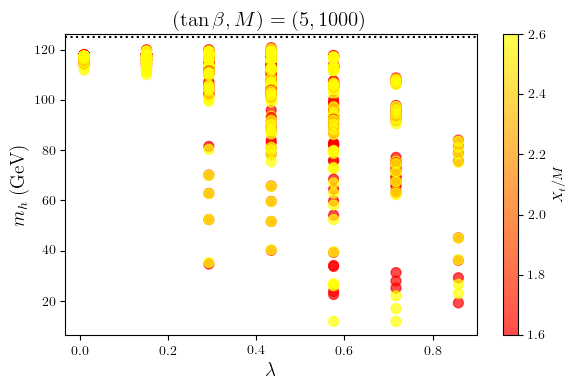

In [100]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(tb5_1K['lam'],  tb5_1K['mhiggs'].apply(lambda x: x[0]).values, c=tb5_1K['Xt/M'], cmap='autumn',s=50,   alpha=0.7)
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M) = (5, 1000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()

### $\tan \beta = 20 $

In [47]:
tb20_1K = df1K[
    (df1K['tanb'] == 20) &
    (df1K['mhiggs'].apply(
        lambda x: isinstance(x, list) and len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)
    ))
].reset_index(drop=True)
tb20_1K = tb20_1K.copy()
tb20_1K['Xt/M'] = tb20_1K['At/M'] - 2/20
tb20_1K.head(2)

,tanb,mA,lam,kappa,At/M,Ak,mhiggs,errors,Xt/M
0,20.0,1000.0,0.01,0.001,2.0,-495.0,"[120.661112, 248.772829, 1158.68998]","[1444672.86, 300000.0, 300000.0]",1.9
1,20.0,1000.0,0.01,0.001,2.0,-242.5,"[122.716407, 334.494609, 1158.67609]","[1444741.06, 300000.0, 300000.0]",1.9


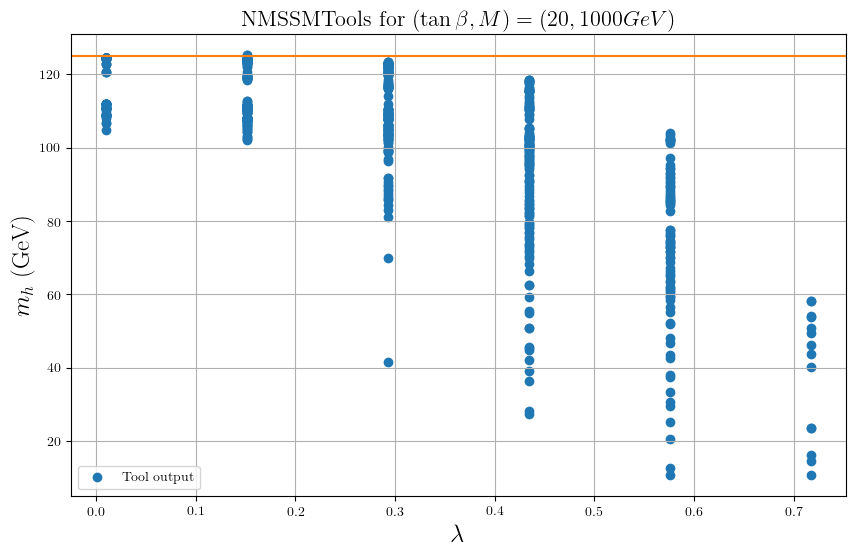

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(tb20_1K['lam'],tb20_1K['mhiggs'].apply(lambda x: x[0]).values, label=r'Tool output')
#plt.errorbar(tb5_1K['lam'], small_list, yerr=small_errors, fmt='.',color='gray', alpha=0.5, capsize=5, label=r'Tool with errors')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$m_h$ (GeV)', fontsize=18)
plt.title(r'NMSSMTools for $(\tan \beta, M) = (20,1000GeV)$', fontsize=16, fontweight='bold' )
# plt.yscale('log')
# plt.xscale('log')
plt.axhline(y=125, color='C1')
plt.legend()
plt.grid(True)
plt.show()

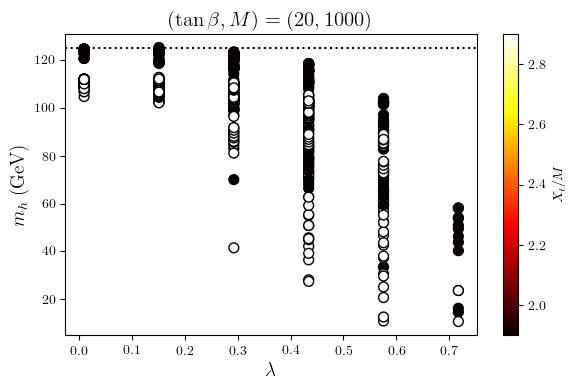

In [49]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(tb20_1K['lam'],  tb20_1K['mhiggs'].apply(lambda x: x[0]).values, c=tb20_1K['Xt/M'], cmap='hot',s=50,  edgecolor='k')
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M) = (20, 1000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()

### $\tan \beta = 50 $

In [51]:
tb50_1K = df1K[
    (df1K['tanb'] == 50) &
    (df1K['mhiggs'].apply(
        lambda x: isinstance(x, list) and len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)
    ))
].reset_index(drop=True)
tb50_1K = tb50_1K.copy()
tb50_1K['Xt/M'] = tb50_1K['At/M'] - 2/50
tb50_1K.head(2)

,tanb,mA,lam,kappa,At/M,Ak,mhiggs,errors,Xt/M
0,50.0,1000.0,0.01,0.001,2.0,-495.0,"[121.166407, 248.787141, 1322.70487]","[5945984.94, 300000.0, 300000.0]",1.96
1,50.0,1000.0,0.01,0.001,2.0,-242.5,"[123.231347, 334.498581, 1322.67494]","[5946167.53, 300000.0, 300000.0]",1.96


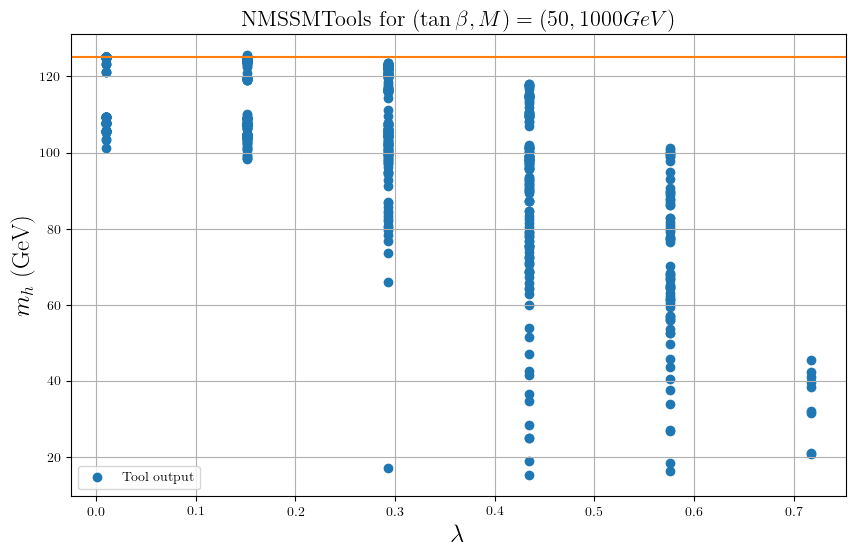

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(tb50_1K['lam'],tb50_1K['mhiggs'].apply(lambda x: x[0]).values, label=r'Tool output')
#plt.errorbar(tb5_1K['lam'], small_list, yerr=small_errors, fmt='.',color='gray', alpha=0.5, capsize=5, label=r'Tool with errors')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$m_h$ (GeV)', fontsize=18)
plt.title(r'NMSSMTools for $(\tan \beta, M) = (50,1000GeV)$', fontsize=16, fontweight='bold' )
# plt.yscale('log')
# plt.xscale('log')
plt.axhline(y=125, color='C1')
plt.legend()
plt.grid(True)
plt.show()

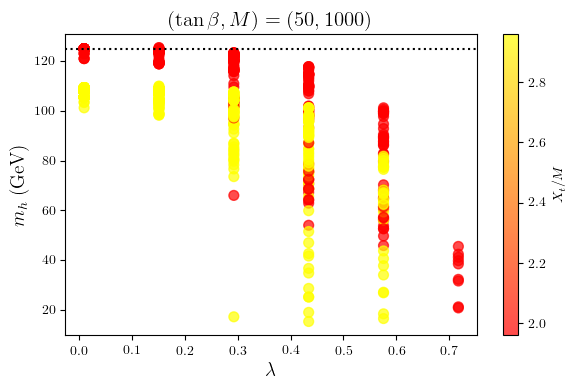

In [99]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(tb50_1K['lam'],  tb50_1K['mhiggs'].apply(lambda x: x[0]).values, c=tb50_1K['Xt/M'], cmap='autumn',s=50,  alpha=0.7)
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M) = (50, 1000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()

# Plot for $M=2000GeV$

In [55]:
# Read the file and parse the 'mhiggs' and 'errors' columns
df2K = pd.read_csv(
    '/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/tool_results_from_cluster/nmssm_params_mass_2000.csv',
    converters={
        'mhiggs': parse_list,
        'errors': parse_list
    },
    index_col = 0
)

print(df2K.dtypes)


tanb      float64
mA        float64
lam       float64
kappa     float64
At/M      float64
Ak        float64
mhiggs     object
errors     object
dtype: object


### $\tan \beta = 5$

In [56]:
tb5_2K = df2K[
    (df2K['tanb'] == 5) &
    (df2K['mhiggs'].apply(
        lambda x: isinstance(x, list) and len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)
    ))
].reset_index(drop=True)
tb5_2K = tb5_2K.copy()
tb5_2K['Xt/M'] = tb5_2K['At/M'] - 2/5
tb5_2K.head(2)

,tanb,mA,lam,kappa,At/M,Ak,mhiggs,errors,Xt/M
0,5.0,1000.0,0.01,0.001,2.0,-1000.0,"[117.470062, 490.249162, 1183.62368]","[928198.73, 300000.0, 300000.0]",1.6
1,5.0,1000.0,0.01,0.001,2.0,-747.5,"[118.465445, 584.044732, 1183.6157]","[928249.78, 300000.0, 300000.0]",1.6


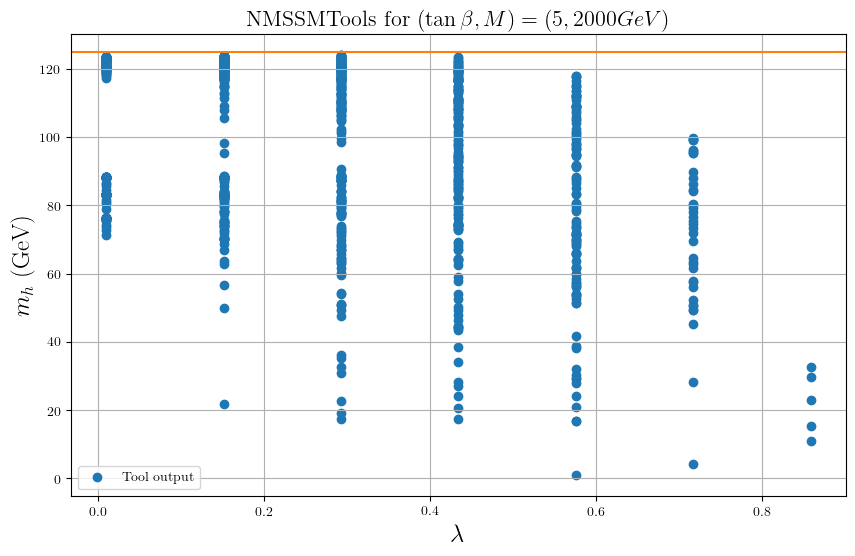

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(tb5_2K['lam'],tb5_2K['mhiggs'].apply(lambda x: x[0]).values, label=r'Tool output')
#plt.errorbar(tb5_1K['lam'], tb5_1K['mhiggs'].apply(lambda x: x[0]).values, yerr=tb5_1K['errors'].apply(lambda x: x[0]).values, fmt='.',color='gray', alpha=0.5, capsize=5, label=r'Tool with errors')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$m_h$ (GeV)', fontsize=18)
plt.title(r'NMSSMTools for $(\tan \beta, M) = (5,2000GeV)$', fontsize=16, fontweight='bold' )
# plt.yscale('log')
# plt.xscale('log')
#plt.ylim(110,140)
plt.axhline(y=125, color='C1')
plt.legend()
plt.grid(True)
plt.show()

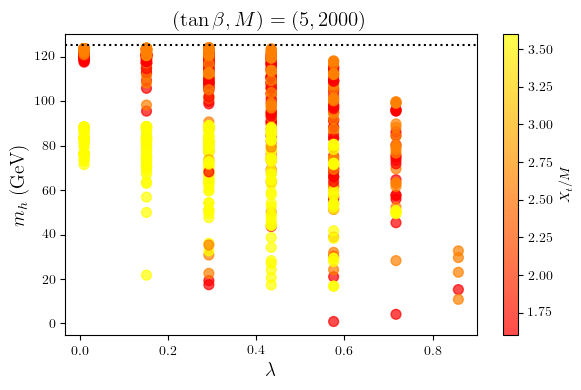

In [98]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(tb5_2K['lam'],  tb5_2K['mhiggs'].apply(lambda x: x[0]).values, c=tb5_2K['Xt/M'], cmap='autumn',s=50,  alpha=0.7)
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M) = (5, 2000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()

### $\tan \beta = 20$

In [60]:
tb20_2K = df2K[
    (df2K['tanb'] == 20) &
    (df2K['mhiggs'].apply(
        lambda x: isinstance(x, list) and len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)
    ))
].reset_index(drop=True)
tb20_2K = tb20_2K.copy()
tb20_2K['Xt/M'] = tb20_2K['At/M'] - 2/20
tb20_2K.head(2)

,tanb,mA,lam,kappa,At/M,Ak,mhiggs,errors,Xt/M
0,20.0,1000.0,0.01,0.001,2.0,-1000.0,"[124.132418, 490.275331, 1584.71004]","[6679801.21, 300000.0, 300000.0]",1.9
1,20.0,1000.0,0.01,0.001,2.0,-747.5,"[125.116417, 584.05763, 1584.69378]","[6679965.82, 300000.0, 300000.0]",1.9


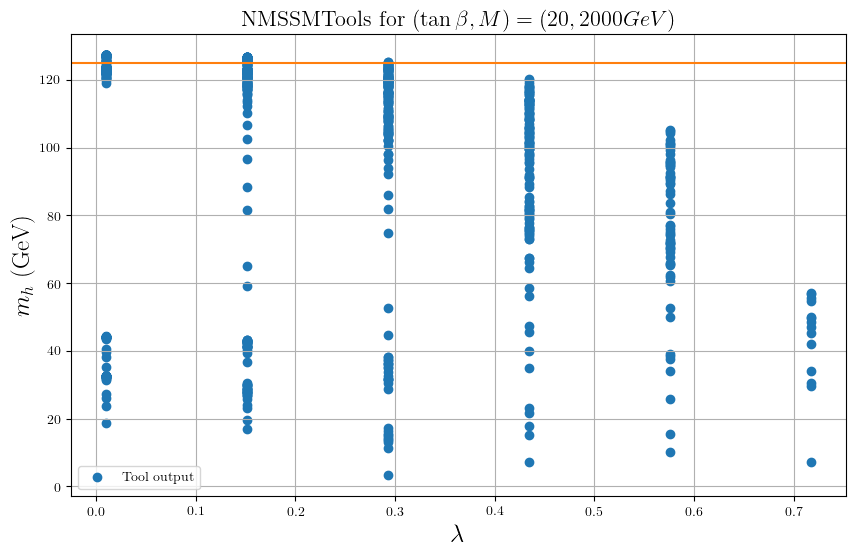

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(tb20_2K['lam'],tb20_2K['mhiggs'].apply(lambda x: x[0]).values, label=r'Tool output')
#plt.errorbar(tb5_1K['lam'], small_list, yerr=small_errors, fmt='.',color='gray', alpha=0.5, capsize=5, label=r'Tool with errors')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$m_h$ (GeV)', fontsize=18)
plt.title(r'NMSSMTools for $(\tan \beta, M) = (20,2000GeV)$', fontsize=16, fontweight='bold' )
# plt.yscale('log')
# plt.xscale('log')
plt.axhline(y=125, color='C1')
plt.legend()
plt.grid(True)
plt.show()

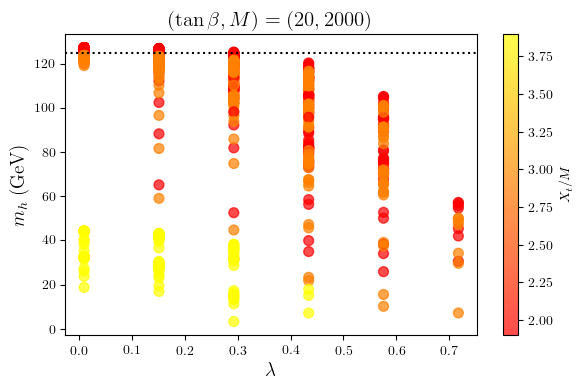

In [97]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(tb20_2K['lam'],  tb20_2K['mhiggs'].apply(lambda x: x[0]).values, c=tb20_2K['Xt/M'], cmap='autumn',s=50,  alpha=0.7)
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M) = (20, 2000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()

### $\tan \beta =50$

In [63]:
tb50_2K = df2K[
    (df2K['tanb'] == 50) &
    (df2K['mhiggs'].apply(
        lambda x: isinstance(x, list) and len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)
    ))
].reset_index(drop=True)
tb50_2K = tb50_2K.copy()
tb50_2K['Xt/M'] = tb50_2K['At/M'] - 2/50
tb50_2K.head(2)

,tanb,mA,lam,kappa,At/M,Ak,mhiggs,errors,Xt/M
0,50.0,1000.0,0.01,0.001,2.0,-1000.0,"[124.746301, 490.27863, 2162.74419]","[None, None, None]",1.96
1,50.0,1000.0,0.01,0.001,2.0,-747.5,"[125.731259, 584.059153, 2162.71539]","[None, None, None]",1.96


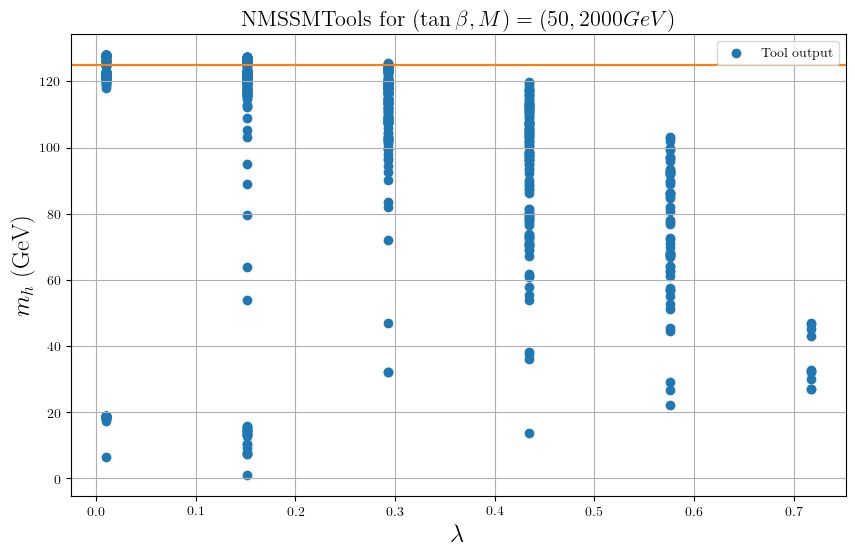

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(tb50_2K['lam'],tb50_2K['mhiggs'].apply(lambda x: x[0]).values, label=r'Tool output')
#plt.errorbar(tb5_1K['lam'], small_list, yerr=small_errors, fmt='.',color='gray', alpha=0.5, capsize=5, label=r'Tool with errors')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$m_h$ (GeV)', fontsize=18)
plt.title(r'NMSSMTools for $(\tan \beta, M) = (50,2000GeV)$', fontsize=16, fontweight='bold' )
# plt.yscale('log')
# plt.xscale('log')
plt.axhline(y=125, color='C1')
plt.legend()
plt.grid(True)
plt.show()

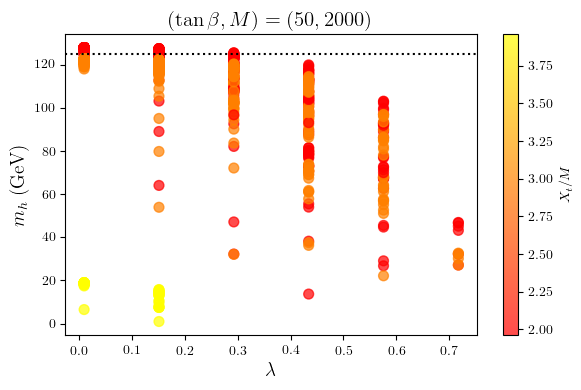

In [101]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(tb50_2K['lam'],  tb50_2K['mhiggs'].apply(lambda x: x[0]).values, c=tb50_2K['Xt/M'], cmap='autumn',s=50,  alpha=0.7)
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M) = (50, 2000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()

# Plot for $M =5000 GeV$

In [67]:
# Read the file and parse the 'mhiggs' and 'errors' columns
df5K = pd.read_csv(
    '/mnt/c/Users/asgia/Documents/research/NMSSMTools_6.1.0/tool_results_from_cluster/nmssm_params_mass_5000.csv',
    converters={
        'mhiggs': parse_list,
        'errors': parse_list
    },
    index_col = 0
)

print(df5K.dtypes)


tanb      float64
mA        float64
lam       float64
kappa     float64
At/M      float64
Ak        float64
mhiggs     object
errors     object
dtype: object


### $\tan \beta = 5$

In [68]:
tb5_5K = df5K[
    (df5K['tanb'] == 5) &
    (df5K['mhiggs'].apply(
        lambda x: isinstance(x, list) and len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)
    ))
].reset_index(drop=True)
tb5_5K = tb5_5K.copy()
tb5_5K['Xt/M'] = tb5_5K['At/M'] - 2/5
tb5_5K.head(2)

,tanb,mA,lam,kappa,At/M,Ak,mhiggs,errors,Xt/M
0,5.0,1000.0,0.01,0.001,2.0,-1000.0,"[122.45076, 1731.11428, 1751.24531]","[9552662.32, 300000.0, 300000.0]",1.6
1,5.0,1000.0,0.01,0.001,2.0,-747.5,"[122.564289, 1751.2261, 1802.57794]","[9552699.58, 300000.0, 300000.0]",1.6


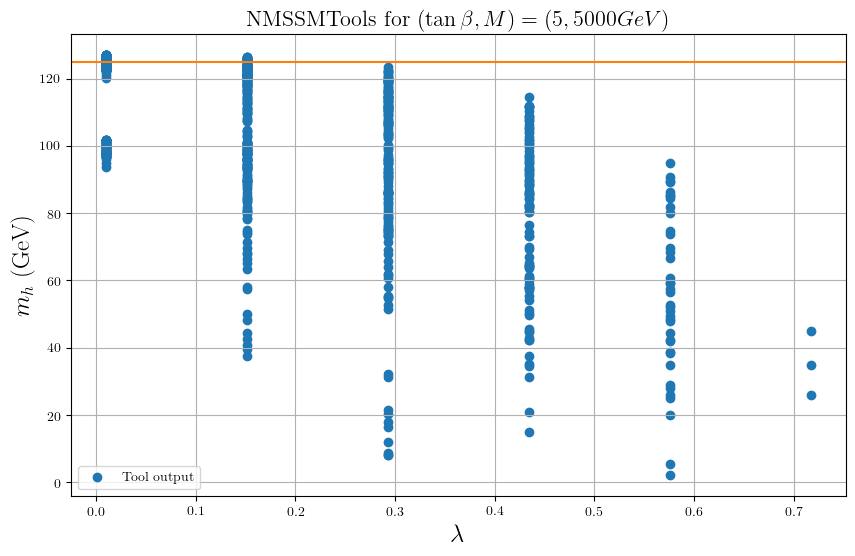

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(tb5_5K['lam'],tb5_5K['mhiggs'].apply(lambda x: x[0]).values, label=r'Tool output')
#plt.errorbar(tb5_1K['lam'], tb5_1K['mhiggs'].apply(lambda x: x[0]).values, yerr=tb5_1K['errors'].apply(lambda x: x[0]).values, fmt='.',color='gray', alpha=0.5, capsize=5, label=r'Tool with errors')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$m_h$ (GeV)', fontsize=18)
plt.title(r'NMSSMTools for $(\tan \beta, M) = (5,5000GeV)$', fontsize=16, fontweight='bold' )
# plt.yscale('log')
# plt.xscale('log')
#plt.ylim(110,140)
plt.axhline(y=125, color='C1')
plt.legend()
plt.grid(True)
plt.show()

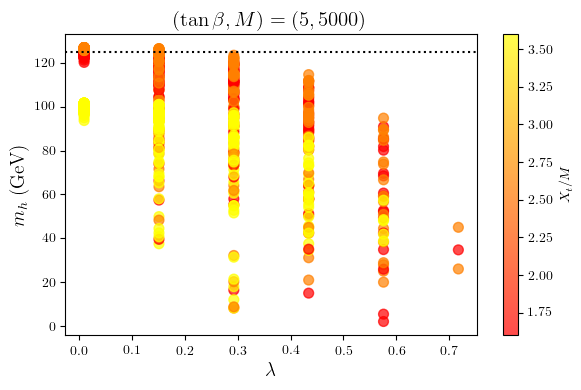

In [102]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(tb5_5K['lam'],  tb5_5K['mhiggs'].apply(lambda x: x[0]).values, c=tb5_5K['Xt/M'], cmap='autumn',s=50,  alpha=0.7)
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M) = (5, 5000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()

### $\tan \beta =20$

In [74]:
tb20_5K = df5K[
    (df5K['tanb'] == 20) &
    (df5K['mhiggs'].apply(
        lambda x: isinstance(x, list) and len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)
    ))
].reset_index(drop=True)
tb20_5K = tb20_5K.copy()
tb20_5K['Xt/M'] = tb20_5K['At/M'] - 2/20
tb20_5K.head(2)

,tanb,mA,lam,kappa,At/M,Ak,mhiggs,errors,Xt/M
0,20.0,1000.0,0.01,0.001,2.0,-1000.0,"[128.718416, 1731.12119, 2997.24065]","[None, None, None]",1.9
1,20.0,1000.0,0.01,0.001,2.0,-747.5,"[128.829389, 1802.56808, 2997.23745]","[None, None, None]",1.9


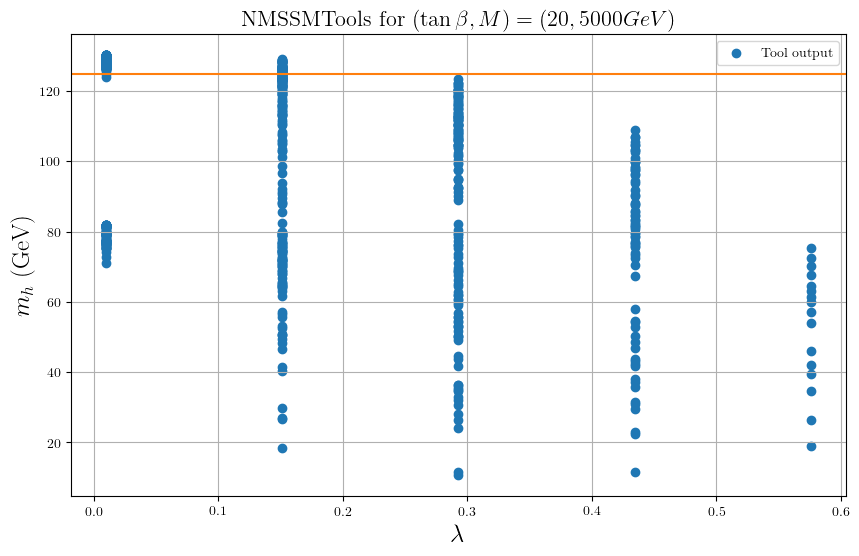

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(tb20_5K['lam'],tb20_5K['mhiggs'].apply(lambda x: x[0]).values, label=r'Tool output')
#plt.errorbar(tb5_1K['lam'], small_list, yerr=small_errors, fmt='.',color='gray', alpha=0.5, capsize=5, label=r'Tool with errors')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$m_h$ (GeV)', fontsize=18)
plt.title(r'NMSSMTools for $(\tan \beta, M) = (20,5000GeV)$', fontsize=16, fontweight='bold' )
# plt.yscale('log')
# plt.xscale('log')
plt.axhline(y=125, color='C1')
plt.legend()
plt.grid(True)
plt.show()

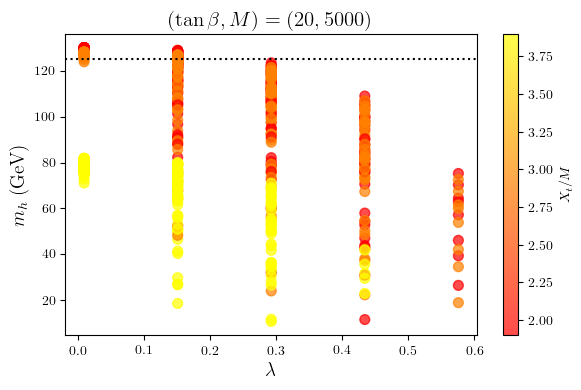

In [103]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(tb20_5K['lam'],  tb20_5K['mhiggs'].apply(lambda x: x[0]).values, c=tb20_5K['Xt/M'], cmap='autumn',s=50, alpha=0.7)
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M) = (20, 5000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()

### $\tan \beta =50$

In [77]:
tb50_5K = df5K[
    (df5K['tanb'] == 50) &
    (df5K['mhiggs'].apply(
        lambda x: isinstance(x, list) and len(x) > 0 and all(v is not None for v in x) and x[0] == min(x)
    ))
].reset_index(drop=True)
tb50_5K = tb50_5K.copy()
tb50_5K['Xt/M'] = tb50_5K['At/M'] - 2/50
tb50_5K.head(2)

,tanb,mA,lam,kappa,At/M,Ak,mhiggs,errors,Xt/M
0,50.0,1000.0,0.01,0.001,2.0,-1000.0,"[129.337318, 1731.11953, 4600.59913]","[None, None, None]",1.96
1,50.0,1000.0,0.01,0.001,2.0,-747.5,"[129.44828, 1802.56646, 4600.59434]","[None, None, None]",1.96


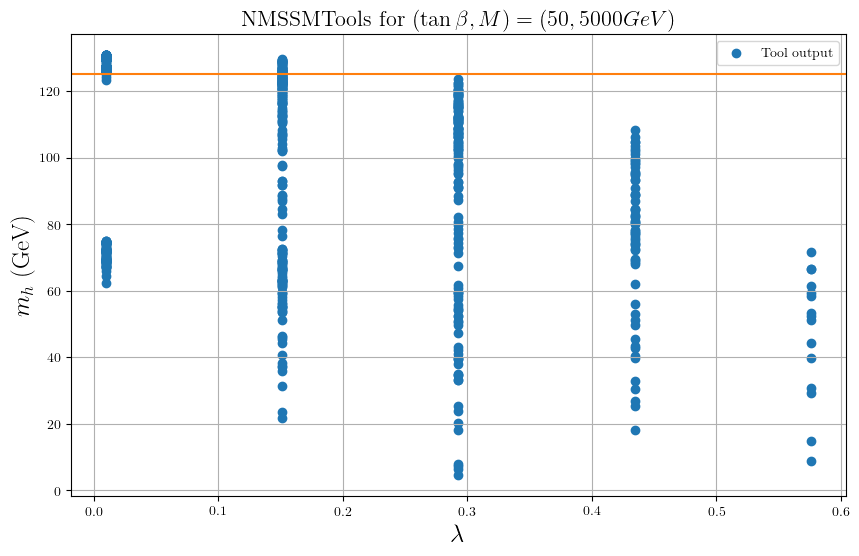

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(tb50_5K['lam'],tb50_5K['mhiggs'].apply(lambda x: x[0]).values, label=r'Tool output')
#plt.errorbar(tb5_1K['lam'], small_list, yerr=small_errors, fmt='.',color='gray', alpha=0.5, capsize=5, label=r'Tool with errors')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$m_h$ (GeV)', fontsize=18)
plt.title(r'NMSSMTools for $(\tan \beta, M) = (50,5000GeV)$', fontsize=16, fontweight='bold' )
# plt.yscale('log')
# plt.xscale('log')
plt.axhline(y=125, color='C1')
plt.legend()
plt.grid(True)
plt.show()

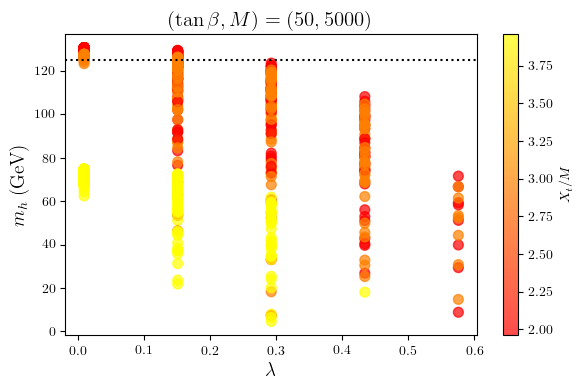

In [104]:
# heat map without interpolation
plt.figure(figsize=(6, 4))
scatter = plt.scatter(tb50_5K['lam'],  tb50_5K['mhiggs'].apply(lambda x: x[0]).values, c=tb50_5K['Xt/M'], cmap='autumn',s=50,  alpha=0.7)
plt.colorbar(scatter, label=r'$X_t / M$')

plt.xlabel(r'$\lambda$', fontsize=14)
plt.ylabel(r'$m_h$ (GeV)', fontsize=14)
plt.title(r'$(\tan \beta, M) = (50, 5000)$ ', fontsize=15, weight='bold')
plt.axhline(y=125, color='black', linestyle=':')
plt.tight_layout()
plt.show()